In [4]:
! pip install mlxtend

In [5]:
import pandas as pd 
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [6]:
titanic = pd .read_csv("Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


## Observation
- There are no null values
-  All the columns are object and categorical in nature
-  As the columns are categorical, we can adopt one-hot-encoding

<BarContainer object of 4 artists>

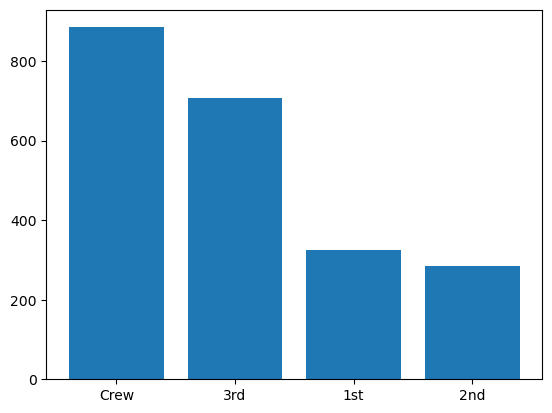

In [9]:
counts = titanic['Class'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 2 artists>

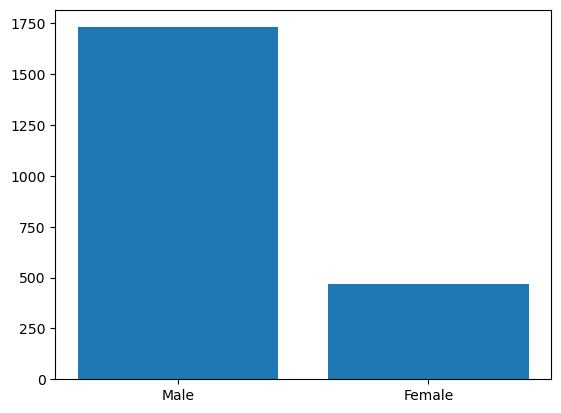

In [10]:
counts = titanic['Gender'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 2 artists>

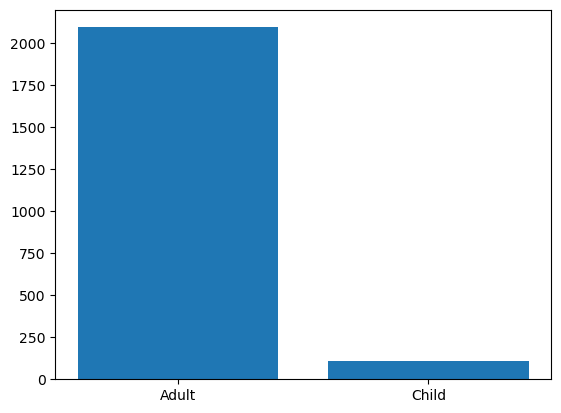

In [11]:
counts = titanic['Age'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 2 artists>

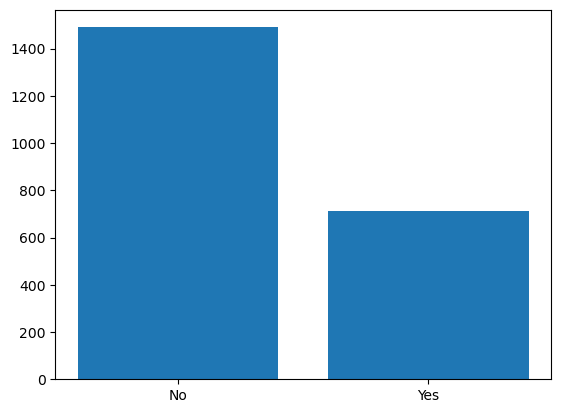

In [12]:
counts = titanic['Survived'].value_counts()
plt.bar(counts.index, counts.values)

In [13]:
df = pd.get_dummies(titanic,dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


In [16]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True, max_len=None)
frequent_itemsets

C:\Users\medis\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Class_1st, Survived_No, Gender_Male, Age_Adult)"
59,0.069968,"(Survived_No, Gender_Male, Class_2nd, Age_Adult)"
60,0.175829,"(Survived_No, Gender_Male, Age_Adult, Class_3rd)"
61,0.304407,"(Class_Crew, Survived_No, Gender_Male, Age_Adult)"


In [19]:
frequent_itemsets = apriori(df, min_support = 0.1, use_colnames=True, max_len=None)
frequent_itemsets

C:\Users\medis\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Class_1st, Age_Adult)"


In [20]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   35 non-null     float64
 1   itemsets  35 non-null     object 
dtypes: float64(1), object(1)
memory usage: 692.0+ bytes


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
1,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
2,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,1.0,0.022745,1.052040,0.293515,0.316547,0.049466,0.551119
3,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,1.0,0.022745,1.281251,0.139592,0.316547,0.219513,0.551119
4,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,1.0,0.075412,8.216621,0.322047,0.491448,0.878295,0.735995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,"(Gender_Male, Age_Adult)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,1.0,0.072822,1.160764,0.986022,0.401198,0.138498,0.698731
70,(Class_Crew),"(Survived_No, Gender_Male, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,1.0,0.061619,1.630802,0.338549,0.433938,0.386805,0.630600
71,(Survived_No),"(Class_Crew, Gender_Male, Age_Adult)",0.676965,0.391640,0.304407,0.449664,1.148157,1.0,0.039280,1.105434,0.399458,0.398335,0.095378,0.613463
72,(Gender_Male),"(Class_Crew, Survived_No, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,1.0,0.063931,1.132622,0.983509,0.386390,0.117093,0.691301


In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
1,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
2,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,1.0,-0.004492,0.588085,-0.041697,0.123346,-0.700435,0.520275
3,(Age_Adult),(Class_2nd),0.950477,0.129487,0.118582,0.124761,0.963505,1.0,-0.004492,0.994601,-0.433377,0.123346,-0.005429,0.520275
4,(Gender_Male),(Class_3rd),0.786461,0.320763,0.231713,0.294627,0.918520,1.0,-0.020555,0.962947,-0.293496,0.264660,-0.038478,0.508503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,"(Gender_Male, Age_Adult)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,1.0,0.072822,1.160764,0.986022,0.401198,0.138498,0.698731
108,(Class_Crew),"(Survived_No, Gender_Male, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,1.0,0.061619,1.630802,0.338549,0.433938,0.386805,0.630600
109,(Survived_No),"(Class_Crew, Gender_Male, Age_Adult)",0.676965,0.391640,0.304407,0.449664,1.148157,1.0,0.039280,1.105434,0.399458,0.398335,0.095378,0.613463
110,(Gender_Male),"(Class_Crew, Survived_No, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,1.0,0.063931,1.132622,0.983509,0.386390,0.117093,0.691301


In [23]:
rules.sort_values(by='lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
68,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,1.0,0.081195,2.639542,0.700873,0.385366,0.621146,0.593987
69,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,1.0,0.081195,1.452431,0.835403,0.385366,0.311499,0.593987
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,1.0,0.087312,2.525187,0.710327,0.410992,0.603990,0.607870
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,1.0,0.087312,1.523634,0.825219,0.410992,0.343674,0.607870
67,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,1.0,0.080121,1.521732,0.793974,0.391089,0.342854,0.577760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"(Survived_Yes, Age_Adult)",(Gender_Male),0.297138,0.786461,0.153567,0.516820,0.657146,1.0,-0.080121,0.441945,-0.426045,0.165120,-1.262724,0.356041
25,(Gender_Male),(Survived_Yes),0.786461,0.323035,0.166742,0.212016,0.656326,1.0,-0.087312,0.859110,-0.710327,0.176867,-0.163995,0.364095
24,(Survived_Yes),(Gender_Male),0.323035,0.786461,0.166742,0.516174,0.656326,1.0,-0.087312,0.441356,-0.436144,0.176867,-1.265745,0.364095
80,"(Gender_Male, Age_Adult)",(Survived_Yes),0.757383,0.323035,0.153567,0.202759,0.627670,1.0,-0.091095,0.849135,-0.709722,0.165686,-0.177669,0.339073


In [24]:
rules.sort_values(by='lift', ascending = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
81,(Survived_Yes),"(Gender_Male, Age_Adult)",0.323035,0.757383,0.153567,0.475387,0.627670,1.0,-0.091095,0.462468,-0.467023,0.165686,-1.162310,0.339073
80,"(Gender_Male, Age_Adult)",(Survived_Yes),0.757383,0.323035,0.153567,0.202759,0.627670,1.0,-0.091095,0.849135,-0.709722,0.165686,-0.177669,0.339073
24,(Survived_Yes),(Gender_Male),0.323035,0.786461,0.166742,0.516174,0.656326,1.0,-0.087312,0.441356,-0.436144,0.176867,-1.265745,0.364095
25,(Gender_Male),(Survived_Yes),0.786461,0.323035,0.166742,0.212016,0.656326,1.0,-0.087312,0.859110,-0.710327,0.176867,-0.163995,0.364095
79,"(Survived_Yes, Age_Adult)",(Gender_Male),0.297138,0.786461,0.153567,0.516820,0.657146,1.0,-0.080121,0.441945,-0.426045,0.165120,-1.262724,0.356041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,1.0,0.080121,2.145099,0.709577,0.391089,0.533821,0.577760
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,1.0,0.087312,1.523634,0.825219,0.410992,0.343674,0.607870
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,1.0,0.087312,2.525187,0.710327,0.410992,0.603990,0.607870
69,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,1.0,0.081195,1.452431,0.835403,0.385366,0.311499,0.593987


In [27]:
rules.sort_values(by='lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
68,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,1.0,0.081195,2.639542,0.700873,0.385366,0.621146,0.593987
69,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,1.0,0.081195,1.452431,0.835403,0.385366,0.311499,0.593987
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,1.0,0.087312,2.525187,0.710327,0.410992,0.603990,0.607870
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,1.0,0.087312,1.523634,0.825219,0.410992,0.343674,0.607870
67,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,1.0,0.080121,1.521732,0.793974,0.391089,0.342854,0.577760
70,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,1.0,0.080121,2.145099,0.709577,0.391089,0.533821,0.577760
107,"(Gender_Male, Age_Adult)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,1.0,0.072822,1.160764,0.986022,0.401198,0.138498,0.698731
102,"(Class_Crew, Survived_No)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,1.0,0.072822,54.427079,0.344592,0.401198,0.981627,0.698731
51,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,1.0,0.087104,9.335480,0.371976,0.510059,0.892882,0.745554
50,"(Gender_Male, Age_Adult)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,1.0,0.087104,1.238157,0.916706,0.510059,0.192348,0.745554


## Conlusion
- Adult Females travelling in 1st class survived most

In [ ]:
import matplotlib.pyplot as plt
rul